In [1]:
import os
import pandas as pd

In [57]:
df_tj = pd.read_csv("./Data/TJ_sat.csv").assign(keyword="Transjakarta")
df_ts = pd.read_csv("./Data/TS_sat.csv").assign(keyword="Transsemarang")

In [58]:
df_tj.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,keyword
0,1804119693726486727,Fri Jun 21 11:50:28 +0000 2024,0,gaasik nih @PT_Transjakarta 9 pluit gadatang d...,1804119693726486727,NaN,NaN,in,"Tangerang, Banten",0,0,0,https://x.com/totaeba_/status/1804119693726486727,721714885512441856,totaeba_,Transjakarta
1,1804117959805395101,Fri Jun 21 11:43:35 +0000 2024,0,Hallo min sebernya penarikan dana itu saat tap...,1804117959805395101,NaN,NaN,in,"Jakarta, Indonesia",0,1,0,https://x.com/haloakubecca/status/180411795980...,96542270,haloakubecca,Transjakarta
2,1804115099902448074,Fri Jun 21 11:32:13 +0000 2024,1,Halo min @PT_Transjakarta di halte Pondok Inda...,1804115099902448074,https://pbs.twimg.com/media/GQmBHXnakAAJLWJ.jpg,NaN,in,NaN,0,1,1,https://x.com/JeaKelana/status/180411509990244...,967380640617263104,JeaKelana,Transjakarta
3,1804114994088583643,Fri Jun 21 11:31:48 +0000 2024,1,Udahnya kartu tiap tap tulisannya reset/tap in...,1804114994088583643,NaN,NaN,in,NaN,0,1,0,https://x.com/kokumble/status/1804114994088583643,934811053069762565,kokumble,Transjakarta
4,1804114544505294903,Fri Jun 21 11:30:00 +0000 2024,1,Kokkkkk tj gabisa ditrack di gmaps lagiiiiii @...,1804114544505294903,NaN,NaN,in,NaN,0,0,0,https://x.com/fadillahasya/status/180411454450...,2678057670,fadillahasya,Transjakarta


In [21]:
# for file in os.listdir("./Data"):
#     df = pd.concat([df, pd.read_csv("./Data/" + file).assign(keyword=os.path.basename("./Data/" + file))])

In [59]:
cleaned_tj = df_tj[df_tj['username'] != "PT_Transjakarta"]
cleaned_ts = df_ts[df_ts['username'] != "Transsemarang"]

In [60]:
print(cleaned_tj.shape)
print(cleaned_ts.shape)

(574, 16)
(506, 16)


In [61]:
cleaned_tj = cleaned_tj.drop(columns=['image_url', 'in_reply_to_screen_name', 'tweet_url', 'user_id_str', 'conversation_id_str'])
cleaned_ts = cleaned_ts.drop(columns=['image_url', 'in_reply_to_screen_name', 'tweet_url', 'user_id_str', 'conversation_id_str'])

In [62]:
cleaned_tj = cleaned_tj.drop_duplicates()
cleaned_tj = cleaned_tj.drop_duplicates(subset=['full_text'])
cleaned_ts = cleaned_ts.drop_duplicates()
cleaned_ts = cleaned_ts.drop_duplicates(subset=['full_text'])

In [63]:
print(cleaned_tj['keyword'].value_counts())

keyword
Transjakarta    574
Name: count, dtype: int64


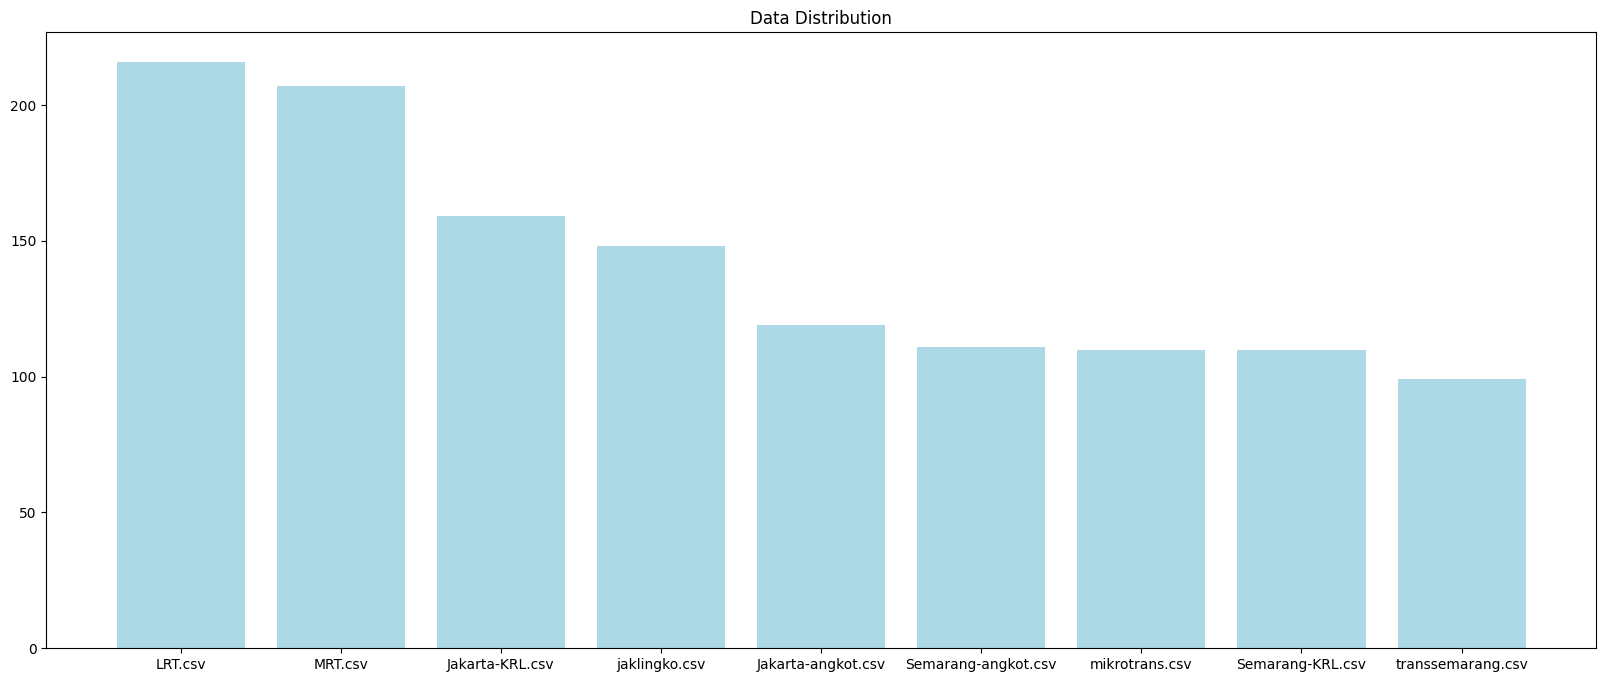

In [18]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,8))
# plt.title('Data Distribution')
# plt.bar(df_important['keyword'].value_counts().keys(), df_important['keyword'].value_counts(), color="lightblue")
# plt.show()

In [64]:
cleaned_tj.to_csv('./Data/Cleaned_TJ_new.csv')
cleaned_ts.to_csv('./Data/Cleaned_TS_new.csv')

In [65]:
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = set(stopwords.words('indonesian')).union({
    'yg', 'dgn', 'kalo', 'bgt', 'aja', 'dr', 'sbg', 'utk', 'tbh', 'tsb', 'tp', 'ya', 'kl', 'klw', 'oh', 'duh', 'waduh', 'min', 'b', 'si'
})

abbreviation_dict = {
    'gk': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'aja': 'saja',
    'dr': 'dari',
}

for i, tweet in enumerate(cleaned_tj['full_text']):
    #to lowercase
    tweet = tweet.lower()
    #remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    #remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    #remove punctuation
    tweet = re.sub(r'\W', ' ', tweet)
    #ganti singkatan
    words = tweet.split()
    normalized_words = [abbreviation_dict[word] if word in abbreviation_dict else word for word in words]
    tweet = ' '.join(normalized_words)
    #filter stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    cleaned_tj.loc[i, 'full_text'] = tweet

for i, tweet in enumerate(cleaned_ts['full_text']):
    #to lowercase
    tweet = tweet.lower()
    #remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    #remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    #remove punctuation
    tweet = re.sub(r'\W', ' ', tweet)
    #ganti singkatan
    words = tweet.split()
    normalized_words = [abbreviation_dict[word] if word in abbreviation_dict else word for word in words]
    tweet = ' '.join(normalized_words)
    #filter stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    cleaned_ts.loc[i, 'full_text'] = tweet

#ga remove hashtags

In [66]:
print(cleaned_tj['full_text'][:20])

0     gaasik nih pluit gadatang dah menit nunggu wid...
1     hallo sebernya penarikan dana tap in tap out s...
2     halo halte pondok indah fasilitas duduk lansia...
3     udahnya kartu tap tulisannya reset tap in lift...
4             kokkkkk tj gabisa ditrack gmaps lagiiiiii
5                   halte permata hijau perpusnas nomor
6     halo stasiun gondangdia galer nasional bus tin...
7          kesel live transjakarta hilang gt keterangan
8          halo halte senayan jcc kuningan city koridor
9                  pinter banget lo bikin susah jakfair
10      halo besok tj gbk kampung melayu beroperasi jam
11    tj menggila guys gw setngah jam nungguin d mun...
12                   halte cibubur junction csw jurusan
13           nunggu tj prj senen udah menitan huftttttt
14             prj pengguna jalur nyambung terima kasih
15    halo bermitra mayasari bakti bus rute jarak ac...
16    rute c arah senayan minggu pagi pas jam cfd me...
17    rute f pinang ranti pondok gede aktif liat

In [56]:
cleaned_tj.to_csv('./Data/Preprocessed_TJ_new.csv')
cleaned_ts.to_csv('./Data/Preprocessed_TS_new.csv')